In [ ]:
"""
ub_zbiornik = 0.000025 / (3 ** (1/2)) # l
ub_czas = 0.5 / (3 ** (1/2)) # s
ub_manometru_l = 0.001 / (3 ** (1/2)) # m
ub_manometru_t = 1000 / (3 ** (1/2)) # Pa

n = 7
d = 0.003
l = 0.400
ro = 997.62
lepkosc_wody = 0.000933
A = 3.14 * d * d / 4

h1 = [0.220, 0.235, 0.245, 0.255, 0.280, 0.300, 0.338]
h2 = [0.195, 0.175, 0.160, 0.150, 0.120, 0.095, 0.049]
p_l = [ro * 9.81 * h1[i] - h2[i] for i in range(n)]
V_l = [0.0005 for v in range(n)]
t_l = [303.12, 153.82, 118.97, 109, 97.45, 80.19, 70.4]



p_t_b = [0.10, 0.06, 0.12, 0.16, 0.18, 0.08, 0.29]
p_t = [p * 10**5 for p in p_t_b]
Vtml = [150, 190, 220, 160, 200]
V_t = [0.0005 for v in range(n)]
t_t = [28.75, 32.07, 23.84, 21.75, 21.09, 28.9, 21.06]


Przep_l = [V_l[i]/t_l[i] for i in range(n)]
Przep_t = [V_t[i]/t_t[i] for i in range(n)]

v_l = [Przep_l[i]/A for i in range(n)]
v_t = [Przep_t[i]/A for i in range(n)]

lambda_l = [2*d*p_l[i] / l / ro / v_l[i] / v_l[i] for i in range(n)]
lambda_t = [2*d*p_t[i] / l / ro / v_t[i] / v_t[i] for i in range(n)]

Reynold_l = [ro * v_l[i] * d / lepkosc_wody for i in range(n)]
Re_l = [64 / lambda_l[i] for i in range(n)]
Re_t = [(0.3164/lambda_t[i])**4 for i in range(n)]
"""

In [6]:
ub_zbiornik = 0.000025 / (3 ** (1/2)) # l
ub_czas = 0.5 / (3 ** (1/2)) # s
ub_manometru_l = 0.001 / (3 ** (1/2)) # m
ub_manometru_t = 1000 / (3 ** (1/2)) # Pa

ro = 997.62
lepkosc_wody = 0.000933
n = 5
d = 0.003
l = 0.400
A = 3.14 * d * d / 4

h1 = [0.21, 0.22, 0.23, 0.24, 0.27]
h2 = [0.19, 0.17, 0.15, 0.14, 0.10]
p_l = [ro * 9.81 * h1[i] - h2[i] for i in range(n)]
Vlm_l = [75, 110, 130, 125, 160]
V_l = [v / 1000000 for v in Vlm_l]
t_l = [43, 33, 31, 26, 27]



p_t_b = [0.10, 0.15, 0.16, 0.10, 0.15]
p_t = [p * 10**5 for p in p_t_b]
Vtml = [150, 190, 220, 160, 200]
V_t = [v / 1000000 for v in Vtml]
t_t = [8, 8, 9, 8, 8]


Przep_l = [V_l[i]/t_l[i] for i in range(n)]
Przep_t = [V_t[i]/t_t[i] for i in range(n)]

v_l = [Przep_l[i]/A for i in range(n)]
v_t = [Przep_t[i]/A for i in range(n)]

lambda_l = [2*d*p_l[i] / l / ro / v_l[i] / v_l[i] for i in range(n)]
lambda_t = [2*d*p_t[i] / l / ro / v_t[i] / v_t[i] for i in range(n)]


Reynold_l = [ro * v_l[i] * d / lepkosc_wody for i in range(n)]
Reynold_t = [ro * v_t[i] * d / lepkosc_wody for i in range(n)]

Re_l = [64 / lambda_l[i] for i in range(n)]
Re_t = [(0.3164/lambda_t[i])**4 for i in range(n)]



In [25]:
def uPrzeplywu(V, t):
    return (((1/t * ub_zbiornik)**2) + ((-V*ub_czas/t**2)**2)) ** (1/2)

def uPredkosci(Vb):
    return 1/A * Vb

def uCisnienL(uh):
    return 9.81 * ro * uh

def uLambd(dp, v, udp, uv):
    return ((2 * d * udp / l / ro / v/v)**2 + (-4*d*dp*uv/l/ro/v/v/v)**2) ** (1/2)

def uReL(l, ul):
    return 64*ul/l/l

def uReT(l, ul):
    return 0.3164**4 * 4 * ul / (l ** 5)

def uReynoldL(uv):
    return ro * d * uv / lepkosc_wody

def uReynoldT(uv):
    return ro * d * uv / lepkosc_wody

In [26]:
niepewnosci_przeplywu_l = [uPrzeplywu(V_l[i], t_l[i]) for i in range(n)]
niepewnosci_przeplywu_t = [uPrzeplywu(V_t[i], t_t[i]) for i in range(n)]

niepewnosci_predkosci_l = [uPredkosci(niepewnosci_przeplywu_l[i]) for i in range(n)]
niepewnosci_predkosci_t = [uPredkosci(niepewnosci_przeplywu_t[i]) for i in range(n)]

niepewnosci_cisnien_l = [uCisnienL(ub_manometru_l) for i in range(n)]
niepewnosci_cisnien_t = [ub_manometru_t for i in range(n)]

niepewnosci_lambd_l = [uLambd(p_l[i], v_l[i], niepewnosci_cisnien_l[i], niepewnosci_predkosci_l[i]) for i in range(n)]
niepewnosci_lambd_t = [uLambd(p_t[i], v_t[i], niepewnosci_cisnien_t[i], niepewnosci_predkosci_t[i]) for i in range(n)]

niepewnosci_re_l = [uReL(lambda_l[i], niepewnosci_lambd_l[i]) for i in range(n)]
niepewnosci_re_t = [uReT(lambda_t[i], niepewnosci_lambd_t[i]) for i in range(n)]


niepewnosci_reynold_l = [uReynoldL(niepewnosci_predkosci_l[i]) for i in range(n)]
niepewnosci_reynold_t = [uReynoldT(niepewnosci_predkosci_t[i]) for i in range(n)]



In [38]:
print("Niepewnosci przepływu l", niepewnosci_przeplywu_l)
print(Przep_l)
print()
print("Niepewnosci przepływu t", niepewnosci_przeplywu_t)
print(Przep_t)
print()
print("Niepewnosci predkosci l", niepewnosci_predkosci_l)
print(v_l)
print()
print("Niepewnosci predkosci t", niepewnosci_predkosci_t)
print(v_t)
print()
print("Niepewnosci cisnien l", niepewnosci_cisnien_l)
print(p_l)
print()
print("Niepewnosci cisnien t", niepewnosci_cisnien_t)
print(p_t)
print()
print("Niepewnosci lambd l", niepewnosci_lambd_l)
print(lambda_l)
print()
print("Niepewnosci lambd t", niepewnosci_lambd_t)
print(lambda_t)
print()
print("Niepewnosci reynoldsa l", niepewnosci_reynold_l)
print(Reynold_l)
print()
print("Niepewnosci reynoldsa t", niepewnosci_reynold_t)
print(Reynold_t)

Niepewnosci przepływu l [3.358729323546606e-07, 4.3835746014449626e-07, 4.672397979581281e-07, 5.577048965561295e-07, 5.383250410331415e-07]
[1.7441860465116278e-06, 3.3333333333333333e-06, 4.1935483870967736e-06, 4.807692307692308e-06, 5.925925925925927e-06]

Niepewnosci przepływu t [1.9269073680922844e-06, 1.9974145071921523e-06, 1.7851498952052654e-06, 1.9432039693935033e-06, 2.0171788261496965e-06]
[1.875e-05, 2.375e-05, 2.4444444444444445e-05, 2e-05, 2.5e-05]

Niepewnosci predkosci l [0.04754040089945655, 0.06204634963120965, 0.0661344370782913, 0.0789391219470813, 0.07619604260907875]
[0.24687700587567268, 0.47180938900684116, 0.5935666506860259, 0.6804943110675594, 0.8387722471232733]

Niepewnosci predkosci t [0.2727398964037203, 0.28271967546951904, 0.2526751444027268, 0.27504656325456517, 0.2855171728449676]
[2.6539278131634814, 3.3616418966737434, 3.459935519383502, 2.830856334041047, 3.538570417551309]

Niepewnosci cisnien l [5.650326282135244, 5.650326282135244, 5.650326282

In [5]:
### RUROCIĄG

przeplyw = 0.25 # m^3/s
l_rurociagu = 35000 # m
d_rurociagu = 0.3 # m
T_rurociagu = 100 # st.C
A_rurociagu = 3.14 * d_rurociagu ** 2 / 4
v_rurociagu = przeplyw / A_rurociagu # m/s
gestosc_ropy = 840.0  # kg/m^3
lepkosc_ropy = 0.017180 # Pa*s
Dh = 4 * A_rurociagu / 3.14 * d_rurociagu
Re_rurociagu = gestosc_ropy * v_rurociagu * Dh / lepkosc_ropy
lambda_rurociagu = 0.3164 / (Re_rurociagu ** (1/4))
dp_rurociagu = lambda_rurociagu * l_rurociagu * gestosc_ropy * v_rurociagu ** 2 / 2 / d_rurociagu
sprawnosc_pompy = 0.7
moc_pompy = przeplyw * dp_rurociagu / sprawnosc_pompy

print(moc_pompy)



8386259.0815167


[791.9274553108958, 1513.461359038601, 1904.032032338885, 2182.876960151829, 2690.5979716241795]
[0.506965173630884, 0.14541710588992143, 0.09605504414011054, 0.07625996885176747, 0.05647022134414257]


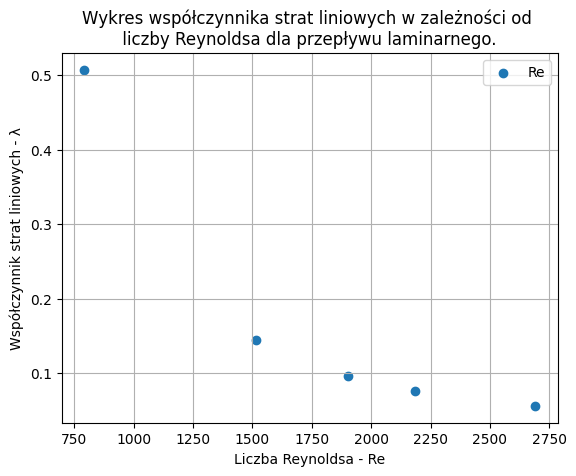

In [32]:
import matplotlib.pyplot as plt

plt.title("Wykres współczynnika strat liniowych w zależności od \n liczby Reynoldsa dla przepływu laminarnego. ", loc = 'center')
plt.xlabel("Liczba Reynoldsa - Re")
plt.ylabel("Współczynnik strat liniowych - λ")
plt.grid()
plt.scatter(Reynold_l, lambda_l)
plt.legend(['Re']) 

print(Reynold_l)
print(lambda_l)


[48256.33100127689, 63166.67221686324, 61447.69022651461, 80869.37517102798, 95213.6371412725]
[0.021347543152703444, 0.01995788314137787, 0.020096021382129136, 0.018762489099055757, 0.018011989535093524]


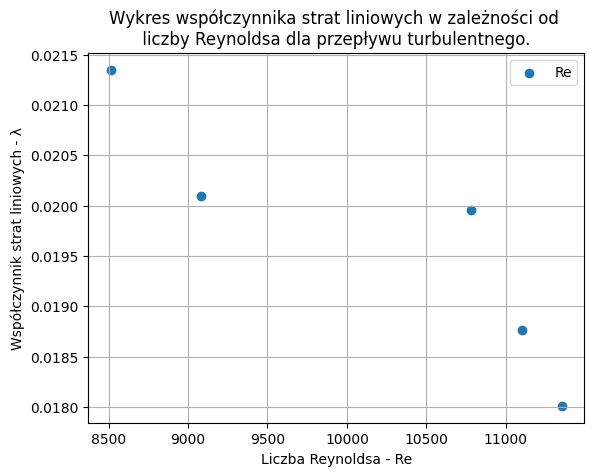

In [40]:
import matplotlib.pyplot

plt.title("Wykres współczynnika strat liniowych w zależności od \n liczby Reynoldsa dla przepływu turbulentnego. ", loc = 'center')
plt.xlabel("Liczba Reynoldsa - Re")
plt.ylabel("Współczynnik strat liniowych - λ")
plt.grid()
plt.scatter(sorted(Reynold_t), sorted(lambda_t)[::-1])
plt.legend(['Re']) 

print(Re_t)
print(lambda_t)
